In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Lê um arquivo do Excel em um DataFrame do pandas
df_realizado = pd.read_excel('dados.xlsx', sheet_name = 'realizado')

In [3]:
df_orcado = pd.read_excel('dados.xlsx', sheet_name = 'orcado')

In [4]:
df_realizado

,Unnamed: 0,Mes_1,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
0,NaN,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
1,Realizado,240,280,200,310,230,213,239,210,210,210,232,213


In [5]:
df_orcado

,mês,orcado
0,janeiro,330
1,fevereiro,290
2,março,230
3,abril,321
4,maio,283
5,junho,291
6,julho,193
7,agosto,259
8,setembro,289
9,outubro,230


In [6]:
#transpõe índice e colunas
df_realizado = df_realizado.T

In [7]:
df_realizado

,0,1
Unnamed: 0,NaN,Realizado
Mes_1,janeiro,240
Mes_2,fevereiro,280
Mes_3,março,200
Mes_4,abril,310
Mes_5,maio,230
Mes_6,junho,213
Mes_7,julho,239
Mes_8,agosto,210
Mes_9,setembro,210


In [8]:
#exclui linha
df_realizado = df_realizado.drop('Unnamed: 0')

In [9]:
df_realizado

,0,1
Mes_1,janeiro,240
Mes_2,fevereiro,280
Mes_3,março,200
Mes_4,abril,310
Mes_5,maio,230
Mes_6,junho,213
Mes_7,julho,239
Mes_8,agosto,210
Mes_9,setembro,210
Mes_10,outubro,210


In [10]:
#renomeia rótulos da coluna do DataFrame
df_realizado.columns = ['mês','realizado']

In [11]:
df_realizado

,mês,realizado
Mes_1,janeiro,240
Mes_2,fevereiro,280
Mes_3,março,200
Mes_4,abril,310
Mes_5,maio,230
Mes_6,junho,213
Mes_7,julho,239
Mes_8,agosto,210
Mes_9,setembro,210
Mes_10,outubro,210


In [12]:
#merge DataFrames
df_final = pd.merge(df_realizado, df_orcado, on = 'mês', how = 'outer')

In [13]:
df_final

,mês,realizado,orcado
0,janeiro,240,330
1,fevereiro,280,290
2,março,200,230
3,abril,310,321
4,maio,230,283
5,junho,213,291
6,julho,239,193
7,agosto,210,259
8,setembro,210,289
9,outubro,210,230


In [14]:
#Faz uma cópia dos índices e dados das colunas selecionadas
df_final = df_final[['mês', 'orcado', 'realizado']].copy()

In [15]:
df_final

,mês,orcado,realizado
0,janeiro,330,240
1,fevereiro,290,280
2,março,230,200
3,abril,321,310
4,maio,283,230
5,junho,291,213
6,julho,193,239
7,agosto,259,210
8,setembro,289,210
9,outubro,230,210


In [16]:
#cria uma nova coluna com o resultado das diferenças de outras colunas
df_final['diff'] = df_final['orcado'] - df_final['realizado']

In [17]:
df_final

,mês,orcado,realizado,diff
0,janeiro,330,240,90
1,fevereiro,290,280,10
2,março,230,200,30
3,abril,321,310,11
4,maio,283,230,53
5,junho,291,213,78
6,julho,193,239,-46
7,agosto,259,210,49
8,setembro,289,210,79
9,outubro,230,210,20


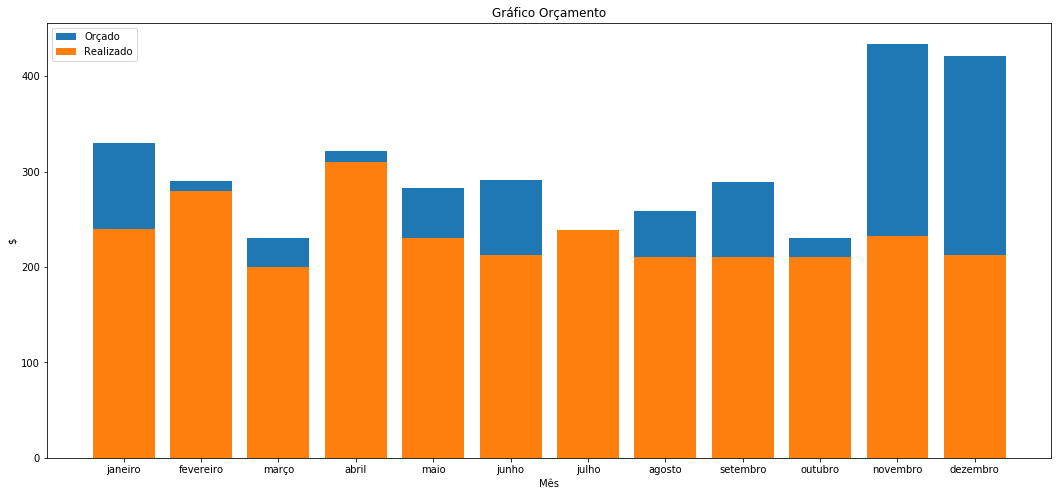

In [18]:
#auxilia no rotulo do eixo x
ind = np.array(df_final['mês'])
#define tamanho do gráfico
plt.figure(figsize=(18, 8))
#cria as barras e define os rotulos do eixo x e eixo y
plt.bar(np.array(df_final['mês']), df_final['orcado'])
plt.bar(np.array(df_final['mês']), df_final['realizado'])
#títulos dos eixos
plt.xlabel('Mês')
plt.ylabel('$')
#define escala do eixo y
plt.yticks(np.arange(0, 500, 100))
#define título do gráfico
plt.title('Gráfico Orçamento')
#define legenda
plt.legend(('Orçado', 'Realizado'))
#salva imagem
plt.savefig('figura_saida.png')
#mostra gráfico na tela
plt.show()

In [19]:
#salva arquivo em csv sem os indices
dados_csv = df_final.to_csv ('dados_saida.csv', index = None)